# Spotify Hit Predictor model for 80's Dataset

### Load Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import joblib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib as mpl #add'l plotting functionality

mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.style.use('dark_background')

### Load Dataset

In [2]:
df = pd.read_csv('dataset-of-80s.csv')
df.head

<bound method NDFrame.head of                                                   track             artist  \
0                                         Walking Blues   Big Joe Williams   
1                                  Suddenly Last Summer         The Motels   
2                                             Sanctuary         Béla Fleck   
3                                        The Wild Rover         The Pogues   
4                                  In The Driver's Seat     John Schneider   
...                                                 ...                ...   
6903  Bachke Rehna Re Baba - Pukar / Soundtrack Version      Kishore Kumar   
6904                                  Tiempos Metálicos                 V8   
6905                                                Joy  Teddy Pendergrass   
6906                                I Wanna Be A Cowboy     Boys Don't Cry   
6907                                    Hot In The City         Billy Idol   

                                 

In [3]:
df.shape

(6908, 19)

6398 smaples having 19 features.

### Shuffle The Data

In [4]:
df = df.sample(frac = 1)

### Balance The Dataset


#### Dropping Categorical features

In [5]:
X = df.drop(['target', 'track', 'artist', 'uri'], axis=1)

In [6]:
X.shape

(6908, 15)

Modified dataframe X


In [7]:
Y = df['target']

Now lets check if hits and flops counts are balanced

In [8]:
hit_flop_count = Y.value_counts()

In [9]:
hit_flop_count

1    3454
0    3454
Name: target, dtype: int64

We observe that dataset target values of hits and flops are well balanced.i.e, equal.

In [10]:
Y = Y.values

### Standardize The Inputs

In [11]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Split The Dataset into Train,Validation and Test

Training and Testing split (ratio of 90% to 10% respectively)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.1, random_state=1)

Training and Validation split

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(1/9), random_state=1)

In [14]:
x_train.shape, x_test.shape, x_val.shape

((5526, 15), (691, 15), (691, 15))

### Create The Deep Learning Algorithm

Using standard notations used globally for training neural networks

In [15]:
nn = 200 #number of neurons in hidden layers
target_count = 2

In [16]:
model_80 = tf.keras.Sequential()
model_80.add(tf.keras.layers.Flatten())

In [17]:
model_80.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# first hidden  layer
model_80.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# second hidden layer
model_80.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# third hidden layer

In [18]:
model_80.add(tf.keras.layers.Dense(target_count, activation=tf.nn.softmax))# output layer

In [19]:
model_80.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Fitting the model

In [20]:
model_fit = model_80.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=100)

Epoch 1/20
56/56 [==============================] - 1s 14ms/step - loss: 0.4931 - accuracy: 0.7626 - val_loss: 0.4651 - val_accuracy: 0.7829
Epoch 2/20
56/56 [==============================] - 0s 4ms/step - loss: 0.4374 - accuracy: 0.7979 - val_loss: 0.4821 - val_accuracy: 0.7685
Epoch 3/20
56/56 [==============================] - 0s 4ms/step - loss: 0.4202 - accuracy: 0.8089 - val_loss: 0.4555 - val_accuracy: 0.7858
Epoch 4/20
56/56 [==============================] - 0s 4ms/step - loss: 0.4069 - accuracy: 0.8147 - val_loss: 0.4813 - val_accuracy: 0.7742
Epoch 5/20
56/56 [==============================] - 0s 4ms/step - loss: 0.3975 - accuracy: 0.8228 - val_loss: 0.4899 - val_accuracy: 0.7699
Epoch 6/20
56/56 [==============================] - 0s 4ms/step - loss: 0.3875 - accuracy: 0.8263 - val_loss: 0.4899 - val_accuracy: 0.7728
Epoch 7/20
56/56 [==============================] - 0s 4ms/step - loss: 0.3713 - accuracy: 0.8326 - val_loss: 0.4913 - val_accuracy: 0.7771
Epoch 8/20
56/56 [=

In [21]:
#Storing the predictions
predictions = model_80.predict(x_test)

### Visualize Neural Network Loss History

#### Loss Variation Plot

In [22]:
training_loss = model_fit.history['loss']
validation_loss = model_fit.history['val_loss']
epoch_count1 = range(1, len(training_loss) + 1)

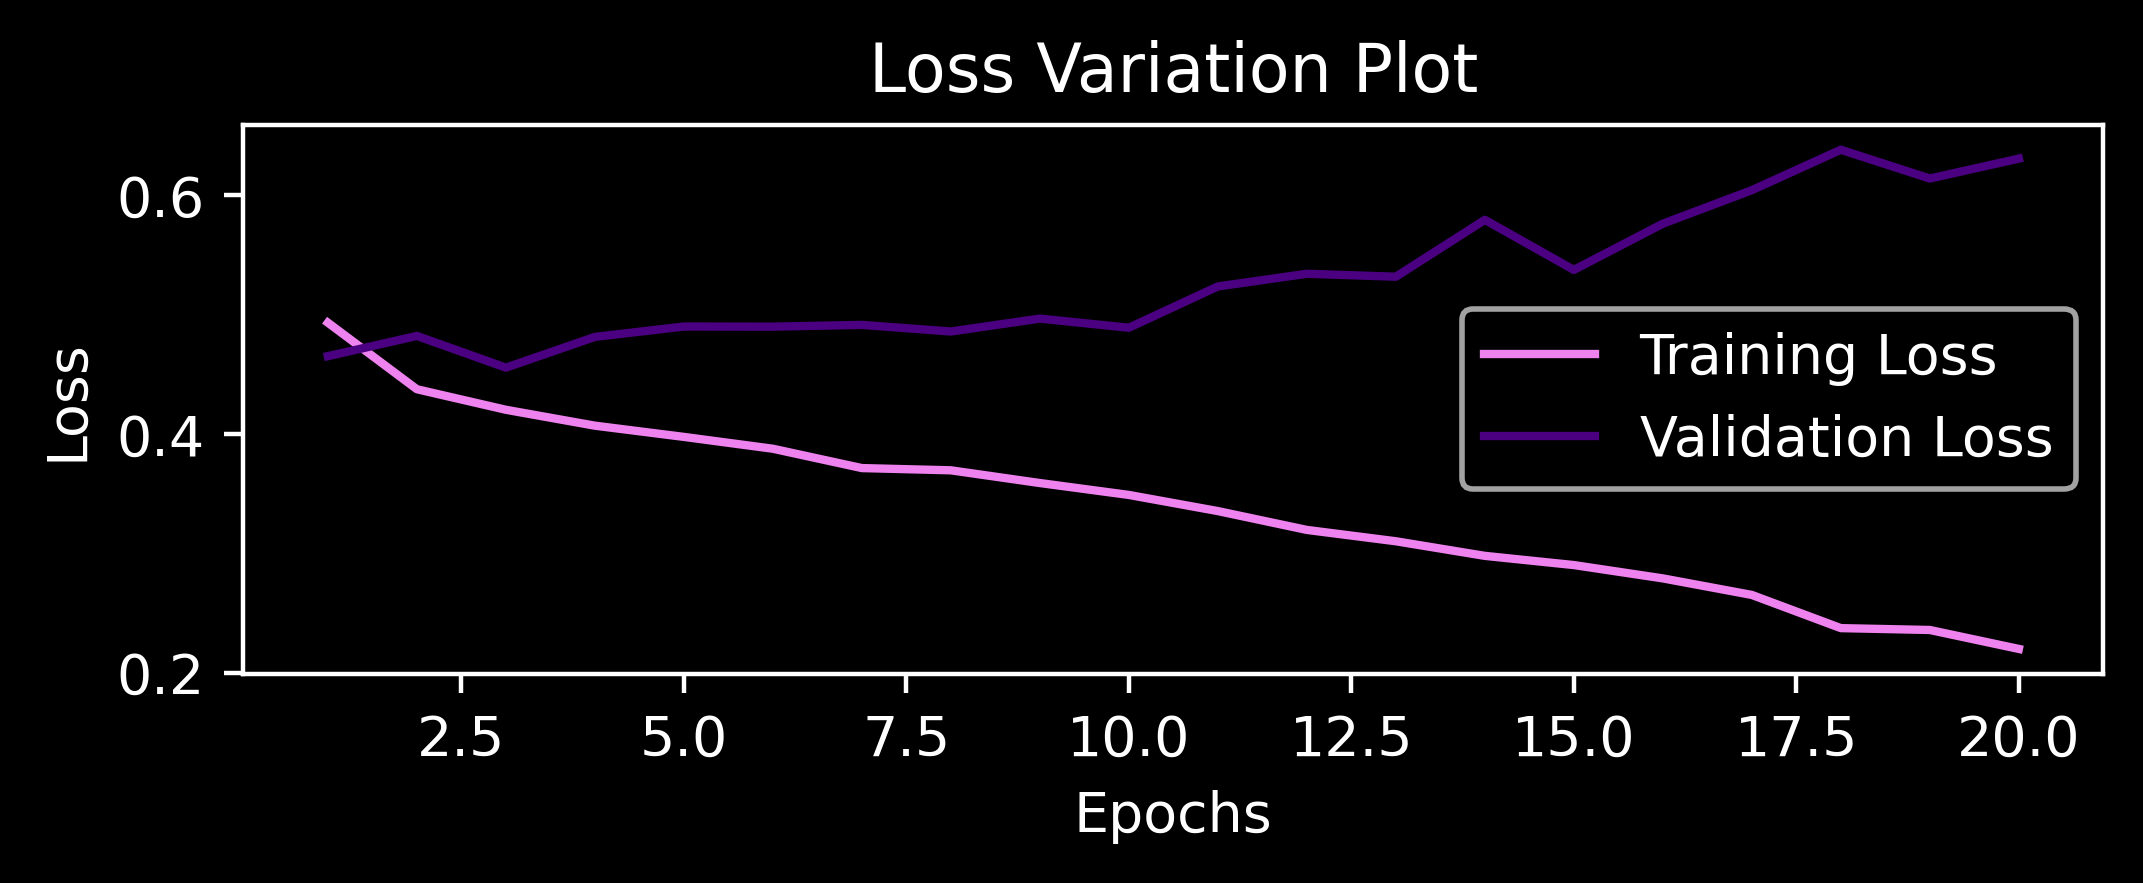

In [23]:
plt.subplot(2,1,2)
plt.title('Loss Variation Plot')
plt.plot(epoch_count1, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count1, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### Accuracy Variation Plot

In [24]:
training_acc = model_fit.history['accuracy']
validation_acc = model_fit.history['val_accuracy']
epoch_count2 = range(1, len(training_acc) + 1)

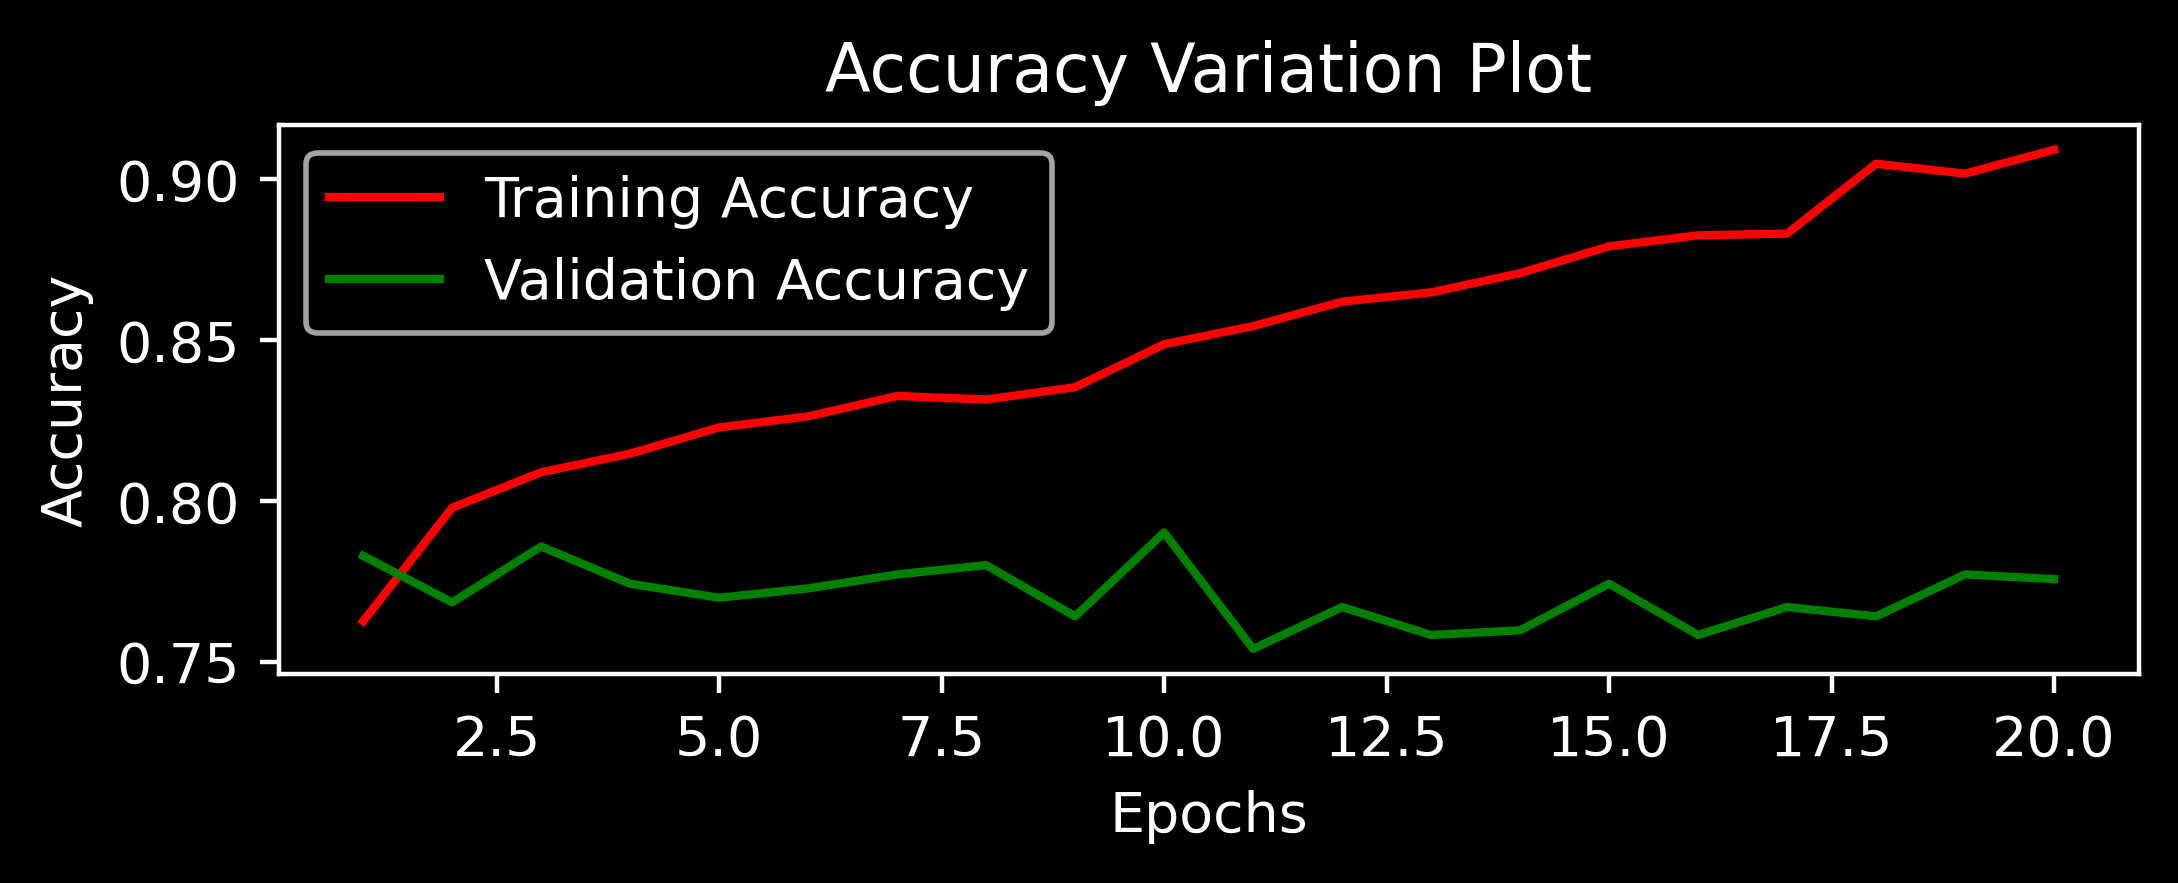

In [25]:
plt.subplot(2,1,2)
plt.title('Accuracy Variation Plot')
plt.plot(epoch_count2, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count2, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Test The Model

In [26]:
print(predictions[215])
print('Predicted:', np.argmax(predictions[215]))
print('Original:', y_test[215])

[0.12983485 0.87016517]
Predicted: 1
Original: 1


### Saving model and Verifying

In [27]:
model_80.save('Trained_model_80')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Trained_model_80\assets


In [28]:
model = tf.keras.models.load_model('Trained_model_80')
print(x_test[1])

[-0.27305516  0.87659197 -0.06487449  0.20955574  0.67402952 -0.24593373
 -0.32042818 -0.4854273  -0.55055369  1.27881957  2.14919475 -0.36462683
  0.20673746 -0.93287718 -0.06208929]


In [29]:
print(x_test[1].reshape( 1,-1))

[[-0.27305516  0.87659197 -0.06487449  0.20955574  0.67402952 -0.24593373
  -0.32042818 -0.4854273  -0.55055369  1.27881957  2.14919475 -0.36462683
   0.20673746 -0.93287718 -0.06208929]]


In [30]:
v = model.predict(x_test[1].reshape( 1,-1))
print(v)

[[0.3086944  0.69130564]]
